<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_6/Primera_entrega_Florin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentación del proyecto**

**Abstracto con Motivación y Audiencia**


Este proyecto de análisis exploratorio de datos (EDA) sobre Spotify busca comprender las tendencias actuales del consumo musical. Analizar las características de las canciones más reproducidas permite revelar patrones culturales y de comportamiento. La motivación es convertir los datos en información útil para artistas, productores y analistas del sector musical interesados en entender cómo se forman las preferencias de escucha.

**Contexto Comercial y Analítico**

Spotify concentra una enorme cantidad de información sobre hábitos y gustos musicales. Desde una mirada comercial, estos datos ayudan a optimizar estrategias de posicionamiento y segmentación. Desde lo analítico, el proyecto aplica herramientas de visualización y estadística descriptiva para detectar relaciones entre atributos sonoros (energía, ritmo, valencia, etc.) y popularidad.

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Preguntas / Hipótesis a Resolver
¿Qué características sonoras predominan en las canciones más populares?
¿Cómo varían las preferencias musicales según el año de lanzamiento?
Hipótesis: Las canciones con mayor energía y ritmo bailable alcanzan mayores niveles de popularidad.

**Objetivo**

Identificar patrones de consumo y atributos musicales que influyen en la popularidad dentro de Spotify, generando insights que sirvan como base para estrategias futuras de marketing, producción y curaduría musical.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [1]:
import pandas as pd


import matplotlib.pyplot as plt


import seaborn as sns

**Configuración del entorno de Python en Google Colab**

**Lectura del dataset**

In [2]:
url_music_dataset = 'https://raw.githubusercontent.com/tiagoflorin/DataScience1/refs/heads/clase_6/global.csv'
music_data = pd.read_csv(url_music_dataset, sep=',')
music_data = pd.DataFrame(music_data)
print(music_data.head())



   position                               track_name            artist  \
0         1                                  Starboy        The Weeknd   
1         2                                   Closer  The Chainsmokers   
2         3                          Let Me Love You          DJ Snake   
3         4  Rockabye (feat. Sean Paul & Anne-Marie)      Clean Bandit   
4         5                                One Dance             Drake   

   streams                                                url  year  month  \
0  3135625  https://open.spotify.com/track/5aAx2yezTd8zXrk...  2017      1   
1  3015525  https://open.spotify.com/track/7BKLCZ1jbUBVqRi...  2017      1   
2  2545384  https://open.spotify.com/track/4pdPtRcBmOSQDlJ...  2017      1   
3  2356604  https://open.spotify.com/track/5knuzwU65gJK7IF...  2017      1   
4  2259887  https://open.spotify.com/track/1xznGGDReH1oQq0...  2017      1   

   day  region  danceability  ...  loudness  mode  speechiness  acousticness  \
0    1

**Análisis inicial del dataset**

In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72600 entries, 0 to 72599
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   position          72600 non-null  int64  
 1   track_name        72585 non-null  object 
 2   artist            72585 non-null  object 
 3   streams           72600 non-null  int64  
 4   url               72600 non-null  object 
 5   year              72600 non-null  int64  
 6   month             72600 non-null  int64  
 7   day               72600 non-null  int64  
 8   region            72600 non-null  object 
 9   danceability      72600 non-null  float64
 10  energy            72600 non-null  float64
 11  key               72600 non-null  int64  
 12  loudness          72600 non-null  float64
 13  mode              72600 non-null  int64  
 14  speechiness       72600 non-null  float64
 15  acousticness      72600 non-null  float64
 16  instrumentalness  72600 non-null  float6

In [4]:
music_data.describe()

,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,72600.000000,7.260000e+04,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000,72600.000000
mean,50.500000,1.570602e+06,2017.502755,6.537190,15.688705,0.705666,0.655617,5.251983,-5.799829,0.584931,0.113260,0.190761,0.005666,0.159859,0.501079,118.811926,212103.241309,3.979545
std,28.866269,9.114492e+05,0.499996,3.452275,8.767302,0.127700,0.149827,3.715792,2.037871,0.492737,0.101317,0.202978,0.044727,0.107072,0.218979,28.513787,37899.523985,0.170910
min,1.000000,5.497840e+05,2017.000000,1.000000,1.000000,0.176000,0.005430,0.000000,-22.507000,0.000000,0.023200,0.000031,0.000000,0.021500,0.037000,46.718000,31200.000000,1.000000
25%,25.750000,9.579698e+05,2017.000000,4.000000,8.000000,0.630000,0.554000,1.000000,-6.855000,0.000000,0.047600,0.039300,0.000000,0.093300,0.338000,96.133000,190932.000000,4.000000
50%,50.500000,1.280397e+06,2018.000000,7.000000,16.000000,0.724000,0.668000,5.000000,-5.535000,1.000000,0.071400,0.119000,0.000000,0.118000,0.492000,112.502000,210240.000000,4.000000
75%,75.250000,1.867071e+06,2018.000000,10.000000,23.000000,0.791000,0.782000,8.000000,-4.328000,1.000000,0.135000,0.258000,0.000016,0.184000,0.678000,139.028000,229573.000000,4.000000
max,100.000000,1.138152e+07,2018.000000,12.000000,31.000000,0.968000,0.978000,11.000000,0.175000,1.000000,0.966000,0.994000,0.942000,0.914000,0.982000,212.117000,487960.000000,5.000000


**Descripción de variables**

Una breve descripción de los atributos:

position: Posición en el ranking en ese día.

stream: Número de reproducciones en ese día.

year: Año del ranking.

month: Mes del ranking.

día: Día del ranking.

danceability: Que tan bailable es una canción (0.0 - 1.0)

energy: Medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (Por ejemplo, Death Metal), mientras que un preludio de Bach tendría una intensidad baja.

key: Clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar una clave, el valor es -1.

loudness: Media del ruido de una canción (en dB).

mode: Modalidad de la canción: Menor (0) o Mayor (1).

speechiness: Presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde solo hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.

acousticness: Confianza de que una canción sea más o menos acústica (vs digital).

instrumentalness: Si una canción contiene o no voces.

liveness: Si una canción se ha grabado "en vivo" o no. Por encima de 0.8 es muy probable que sea en vivo.

valence: El positivismo de una canción. Cuando el valor es cercano a 1.0, la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.

tempo: El tempo medio estimado en "beats per minute" (BPM). Es sinónimo de la velocidad de una canción.

duration_ms: Duración total del track.

time_signature: Compás medio del track. Mide las pulsaciones que hay por cada compás.

# **Data Wrangling - Limpieza y transformación de datos**

**Valores duplicados**

**Valores nulos**

**Tratamiento de valores outliers**

**Otras transformaciones, normalización, fechas**

# **Análisis Exploratorio de datos**

**Análisis univariado**

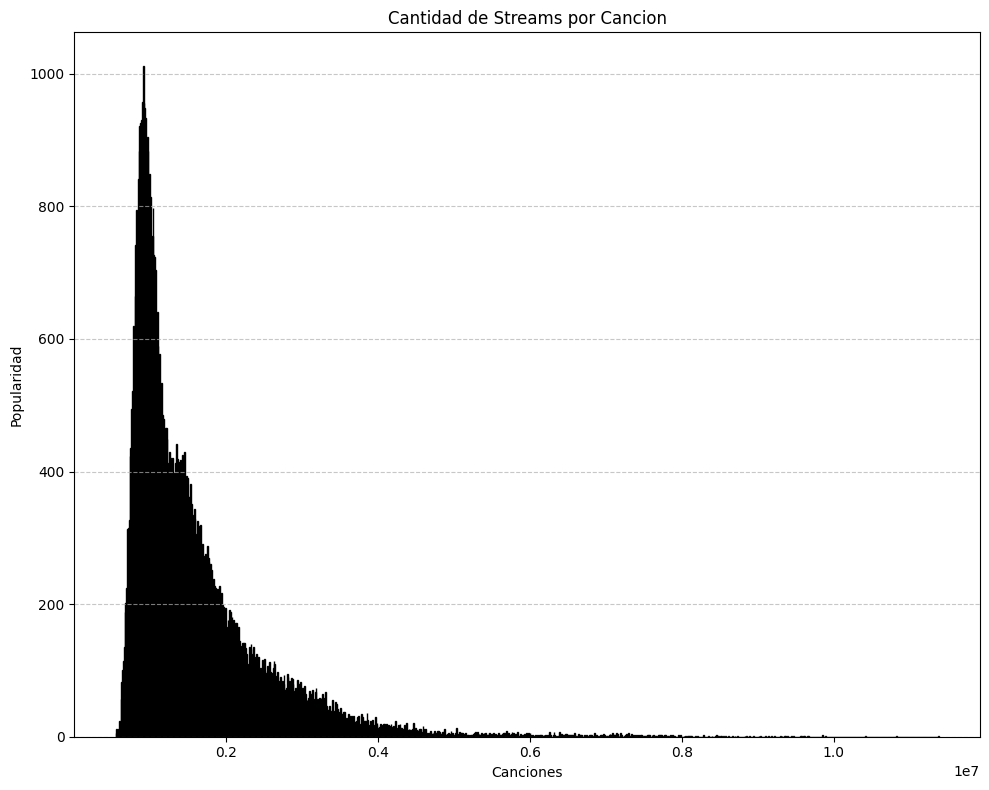

In [5]:
plt.figure(figsize=(10, 8))
plt.hist(music_data.streams, bins=1000, color='skyblue', edgecolor='black')

# Etiquetas y título
plt.title("Cantidad de Streams por Cancion")
plt.xlabel("Canciones")
plt.ylabel("Popularidad")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Análisis bivariado**

**Análisis multivariado**

**Conclusiones del EDA**